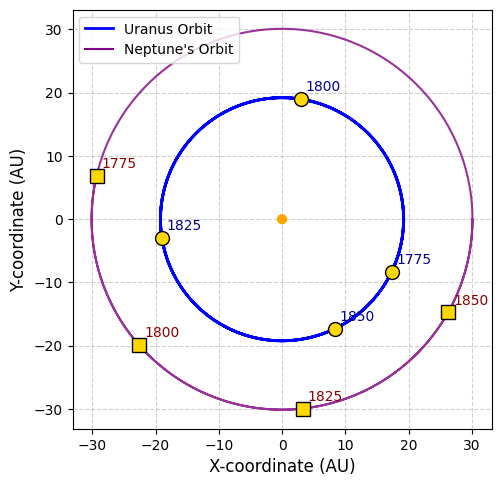

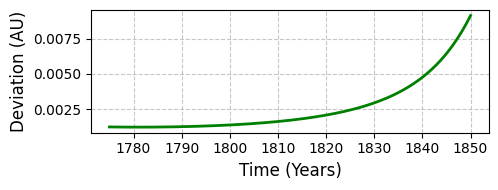

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D # Needed for creating custom legend handles

# --- Orbital Parameters (Approximate Real-World Values) ---
# These values are based on actual orbital periods and semi-major axes,
# providing a more realistic basis for the simulation.
ORBITAL_PERIOD_URANUS_YEARS = 84.01      # Uranus's orbital period in Earth years
ORBITAL_PERIOD_NEPTUNE_YEARS = 164.79    # Neptune's orbital period in Earth years

SEMI_MAJOR_AXIS_URANUS_AU = 19.22        # Uranus's average distance from Sun in Astronomical Units (AU)
SEMI_MAJOR_AXIS_NEPTUNE_AU = 30.11       # Neptune's average distance from Sun in AU

# For simplicity, we'll use these semi-major axes as the orbital radii
# in our idealized circular orbit model.
URANUS_ORBIT_RADIUS = SEMI_MAJOR_AXIS_URANUS_AU
NEPTUNE_ORBIT_RADIUS = SEMI_MAJOR_AXIS_NEPTUNE_AU

# --- Simulation Parameters for Both Plots ---
# The reference year for initial planetary positions. Uranus was discovered in 1781.
REFERENCE_YEAR_FOR_ANGLES = 1781.0

# Angular velocities (radians per year) calculated from orbital periods.
# Assuming counter-clockwise motion.
ANGULAR_VELOCITY_URANUS_RAD_PER_YEAR = 2 * np.pi / ORBITAL_PERIOD_URANUS_YEARS
ANGULAR_VELOCITY_NEPTUNE_RAD_PER_YEAR = 2 * np.pi / ORBITAL_PERIOD_NEPTUNE_YEARS

# --- Initial Angular Positions at REFERENCE_YEAR_FOR_ANGLES (1781.0) ---
# These are approximate initial angles chosen for demonstration purposes to
# ensure a visible perturbation effect. In a real astronomical simulation,
# these would be derived from precise ephemeris data for the given date.
INITIAL_ANGLE_URANUS_RAD_AT_REF_YEAR = 0.0 # Uranus starting at 0 radians (along positive X-axis)
INITIAL_ANGLE_NEPTUNE_RAD_AT_REF_YEAR = np.pi # Neptune starting at pi radians (opposite Uranus)

# --- Perturbation Strength Factor ---
# This factor is used to exaggerate the gravitational perturbation for visual clarity.
# In reality, the deviation is much smaller and requires very precise measurements.
# Adjust this value to make the "wobble" more or less pronounced.
PERTURBATION_FACTOR = 3.0

# --- Function to Calculate Planetary Positions ---
# This function encapsulates the core logic for calculating predicted and perturbed
# positions based on a given time (relative to the reference year).
def calculate_positions(t_elapsed_from_ref_year, perturbation_factor):
    """
    Calculates the predicted and perturbed positions of Uranus, and Neptune's position.

    Args:
        t_elapsed_from_ref_year (float): Time elapsed in years since the reference year.
        perturbation_factor (float): Factor to scale the perturbation magnitude.

    Returns:
        tuple: (ux_pred, uy_pred, ux_perturbed, uy_perturbed, nx, ny)
               x,y coordinates for predicted Uranus, perturbed Uranus, and Neptune.
    """
    # Calculate angles for Uranus and Neptune at this time, relative to their initial positions
    angle_uranus_predicted = INITIAL_ANGLE_URANUS_RAD_AT_REF_YEAR + ANGULAR_VELOCITY_URANUS_RAD_PER_YEAR * t_elapsed_from_ref_year
    angle_neptune = INITIAL_ANGLE_NEPTUNE_RAD_AT_REF_YEAR + ANGULAR_VELOCITY_NEPTUNE_RAD_PER_YEAR * t_elapsed_from_ref_year

    # Predicted Uranus position (without Neptune's influence)
    ux_pred = URANUS_ORBIT_RADIUS * np.cos(angle_uranus_predicted)
    uy_pred = URANUS_ORBIT_RADIUS * np.sin(angle_uranus_predicted)

    # Neptune's position
    nx = NEPTUNE_ORBIT_RADIUS * np.cos(angle_neptune)
    ny = NEPTUNE_ORBIT_RADIUS * np.sin(angle_neptune)

    # Calculate perturbation: Simplified vector from Neptune to Uranus
    dx_neptune_to_uranus = nx - ux_pred
    dy_neptune_to_uranus = ny - uy_pred
    distance_neptune_uranus = np.sqrt(dx_neptune_to_uranus**2 + dy_neptune_to_uranus**2)

    # Avoid division by zero if planets are at the same point (highly unlikely in this model)
    perturb_direction_x = dx_neptune_to_uranus / distance_neptune_uranus if distance_neptune_uranus > 0 else 0
    perturb_direction_y = dy_neptune_to_uranus / distance_neptune_uranus if distance_neptune_uranus > 0 else 0

    # Perturbation magnitude (inverse square law-like, softened for visualization)
    # The '+ 0.1' in the denominator prevents extremely large values if distance is near zero.
    perturb_magnitude = perturbation_factor / (distance_neptune_uranus**2 + 0.1)

    # Perturbed Uranus position
    ux_perturbed = ux_pred + perturb_direction_x * perturb_magnitude
    uy_perturbed = uy_pred + perturb_direction_y * perturb_magnitude

    return ux_pred, uy_pred, ux_perturbed, uy_perturbed, nx, ny

# --- Data Generation for Figure 1 (Orbital Paths + Discrete Points) ---
# Time range for calculating the continuous orbital paths.
# It needs to cover the discrete years and show enough of the orbits.
START_YEAR_ORBITS_PLOT = 1775.0
END_YEAR_ORBITS_PLOT = 1781.0 + ORBITAL_PERIOD_NEPTUNE_YEARS * 1.5
NUM_POINTS_FOR_ORBIT_PATHS = 2000 # More points for smoother continuous paths

time_in_years_for_paths = np.linspace(START_YEAR_ORBITS_PLOT, END_YEAR_ORBITS_PLOT, NUM_POINTS_FOR_ORBIT_PATHS)

# Store data for the continuous paths
uranus_perturbed_x_path = []
uranus_perturbed_y_path = []
neptune_x_path = []
neptune_y_path = []

# Store data for specific discrete points (for highlighting)
discrete_uranus_x = []
discrete_uranus_y = []
discrete_neptune_x = []
discrete_neptune_y = []
discrete_years_actual = []

# Specific years to plot as discrete, highlighted points
SPECIFIC_YEARS_TO_PLOT_DISCRETE = [1775, 1800, 1825, 1850]

# Iterate through the time for continuous paths and also capture discrete points
for t_current_year in time_in_years_for_paths:
    t_elapsed_from_ref_year = t_current_year - REFERENCE_YEAR_FOR_ANGLES

    ux_pred, uy_pred, ux_perturbed, uy_perturbed, nx, ny = \
        calculate_positions(t_elapsed_from_ref_year, PERTURBATION_FACTOR)

    # Store for continuous paths
    uranus_perturbed_x_path.append(ux_perturbed)
    uranus_perturbed_y_path.append(uy_perturbed)
    neptune_x_path.append(nx)
    neptune_y_path.append(ny)

# After generating all path data, go back and find the exact points for discrete years
for target_year in SPECIFIC_YEARS_TO_PLOT_DISCRETE:
    # Find the index in time_in_years_for_paths closest to the target_year
    closest_index = np.argmin(np.abs(time_in_years_for_paths - target_year))

    # Retrieve the calculated positions at this closest index
    discrete_uranus_x.append(uranus_perturbed_x_path[closest_index])
    discrete_uranus_y.append(uranus_perturbed_y_path[closest_index])
    discrete_neptune_x.append(neptune_x_path[closest_index])
    discrete_neptune_y.append(neptune_y_path[closest_index])
    discrete_years_actual.append(int(round(time_in_years_for_paths[closest_index])))


# --- Figure 1: Orbital Paths with Highlighted Discrete Planetary Positions ---
fig1, ax1 = plt.subplots(figsize=(6, 6)) # Set figure size
ax1.set_aspect('equal', adjustable='box') # Ensure circular orbits appear circular

# Set plot limits based on Neptune's orbit radius for good visibility
ax1.set_xlim([-NEPTUNE_ORBIT_RADIUS * 1.1, NEPTUNE_ORBIT_RADIUS * 1.1])
ax1.set_ylim([-NEPTUNE_ORBIT_RADIUS * 1.1, NEPTUNE_ORBIT_RADIUS * 1.1])

ax1.set_xlabel("X-coordinate (AU)", fontsize=12)
ax1.set_ylabel("Y-coordinate (AU)", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Sun at the origin
ax1.add_patch(Circle((0, 0), 0.7, color='orange', zorder=5, label='Sun'))

# Plot Neptune's full continuous orbit
ax1.plot(neptune_x_path, neptune_y_path, color='purple', linestyle='-', alpha=0.8, linewidth=1.5, label='Neptune\'s Orbit')

# Plot Uranus's full continuous perturbed orbit
ax1.plot(uranus_perturbed_x_path, uranus_perturbed_y_path, color='blue', linewidth=2, label='Uranus Perturbed Orbit')

# Plot discrete points for Uranus and Neptune with year labels
for i in range(len(discrete_uranus_x)):
    # Uranus discrete position
    ax1.plot(discrete_uranus_x[i], discrete_uranus_y[i], 'o',
             color='gold', markersize=10, markeredgecolor='black', linewidth=1, alpha=1.0, zorder=10) # Highlighted color
    ax1.text(discrete_uranus_x[i] + 0.8, discrete_uranus_y[i] + 0.8,
             str(discrete_years_actual[i]), fontsize=10, color='darkblue', ha='left', va='bottom')

    # Neptune discrete position
    ax1.plot(discrete_neptune_x[i], discrete_neptune_y[i], 's',
             color='gold', markersize=10, markeredgecolor='black', linewidth=1, alpha=1.0, zorder=10) # Highlighted color
    ax1.text(discrete_neptune_x[i] + 0.8, discrete_neptune_y[i] + 0.8,
             str(discrete_years_actual[i]), fontsize=10, color='darkred', ha='left', va='bottom')

# Create custom legend handles for the discrete points
legend_uranus_path = Line2D([0], [0], color='blue', lw=2, label='Uranus Orbit')
legend_neptune_path = Line2D([0], [0], color='purple', lw=1.5, label='Neptune\'s Orbit')


# Combine all legend handles and labels
ax1.legend(handles=[legend_uranus_path, legend_neptune_path],
           loc='upper left', fontsize=10, title_fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
plt.savefig("orbits.png")
plt.show() # Display the first figure

# --- Data Generation for Figure 2 (Deviation Magnitude Plot) ---
# Time range for the deviation plot (1775 to 1850)
START_YEAR_DEVIATION_PLOT = 1775.0
END_YEAR_DEVIATION_PLOT = 1850.0
NUM_POINTS_FOR_DEVIATION_PLOT = 1000 # Keep it smooth

time_in_years_for_deviation = np.linspace(START_YEAR_DEVIATION_PLOT, END_YEAR_DEVIATION_PLOT, NUM_POINTS_FOR_DEVIATION_PLOT)

# Store the magnitude of the deviation at each time step for this plot
deviation_magnitudes_plot = []

# Iterate through the time for the deviation plot
for t_current_year in time_in_years_for_deviation:
    t_elapsed_from_ref_year = t_current_year - REFERENCE_YEAR_FOR_ANGLES

    ux_pred, uy_pred, ux_perturbed, uy_perturbed, _, _ = \
        calculate_positions(t_elapsed_from_ref_year, PERTURBATION_FACTOR)

    # Calculate and store the deviation magnitude
    deviation_mag = np.sqrt((ux_perturbed - ux_pred)**2 + (uy_perturbed - uy_pred)**2)
    deviation_magnitudes_plot.append(deviation_mag)

# --- Figure 2: Deviation Magnitude Plot ---
fig2, ax2 = plt.subplots(figsize=(5, 2)) # Set figure size
ax2.plot(time_in_years_for_deviation, deviation_magnitudes_plot, color='green', linewidth=2)
ax2.set_xlabel("Time (Years)", fontsize=12)
ax2.set_ylabel("Deviation (AU)", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
plt.savefig("deviation.png")
plt.show() # Display the second figure
